In [1]:
import pandas
import mba263
import numpy
import matplotlib.pyplot as plt
import statsmodels.api as sm

In [2]:
import warnings
warnings.filterwarnings("ignore")

In [3]:
data = pandas.read_csv('cell2cell.csv')

In [4]:
data.describe()

,customer,calibrat,churn,churndep,revenue,mou,recchrge,directas,overage,roam,...,retaccpt,newcelly,newcelln,refer,incmiss,income,mcycle,setprcm,setprc,retcall
count,7.104700e+04,71047.000000,71047.000000,40000.000000,70831.000000,70831.000000,70831.000000,70831.000000,70831.000000,70831.000000,...,71047.000000,71047.000000,71047.000000,71047.000000,71047.000000,71047.000000,71047.000000,71047.000000,71047.000000,71047.000000
mean,1.050487e+06,0.563008,0.290076,0.500000,58.852803,525.728392,46.876305,0.894027,40.095361,1.221071,...,0.017918,0.192943,0.138781,0.050854,0.249835,4.334229,0.013456,0.566512,35.798580,0.034034
std,2.919911e+04,0.496018,0.453800,0.500006,44.243583,530.134259,23.915095,2.197709,96.347103,9.081089,...,0.141485,0.394611,0.345721,0.290444,0.432920,3.137063,0.115217,0.495560,57.040961,0.181317
min,1.000001e+06,0.000000,0.000000,0.000000,-6.167500,0.000000,-11.290000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.025144e+06,0.000000,0.000000,0.000000,33.642502,158.250000,30.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
50%,1.050370e+06,1.000000,0.000000,0.500000,48.529999,366.000000,44.990002,0.247500,2.500000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,0.000000,1.000000,0.000000,0.000000
75%,1.076230e+06,1.000000,1.000000,1.000000,71.029999,721.750000,59.990002,0.990000,40.750000,0.257500,...,0.000000,0.000000,0.000000,0.000000,0.000000,7.000000,0.000000,1.000000,39.989990,0.000000
max,1.099999e+06,1.000000,1.000000,1.000000,1223.380000,7667.750000,399.989990,159.390000,4320.750000,1112.447500,...,4.000000,1.000000,1.000000,35.000000,1.000000,9.000000,1.000000,1.000000,499.989990,1.000000


In [5]:
data.columns

Index(['customer', 'calibrat', 'churn', 'churndep', 'revenue', 'mou',
       'recchrge', 'directas', 'overage', 'roam', 'changem', 'changer',
       'dropvce', 'blckvce', 'unansvce', 'custcare', 'threeway', 'mourec',
       'outcalls', 'incalls', 'peakvce', 'opeakvce', 'dropblk', 'callfwdv',
       'callwait', 'months', 'uniqsubs', 'actvsubs', 'phones', 'models',
       'eqpdays', 'age1', 'age2', 'children', 'credita', 'creditaa',
       'prizmrur', 'prizmub', 'prizmtwn', 'refurb', 'webcap', 'truck', 'rv',
       'occprof', 'occcler', 'occcrft', 'occstud', 'occhmkr', 'occret',
       'occself', 'ownrent', 'marryun', 'marryyes', 'mailord', 'mailres',
       'mailflag', 'travel', 'pcown', 'creditcd', 'retcalls', 'retaccpt',
       'newcelly', 'newcelln', 'refer', 'incmiss', 'income', 'mcycle',
       'setprcm', 'setprc', 'retcall'],
      dtype='object')

In [6]:
data

,customer,calibrat,churn,churndep,revenue,mou,recchrge,directas,overage,roam,...,retaccpt,newcelly,newcelln,refer,incmiss,income,mcycle,setprcm,setprc,retcall
0,1000002,0,0,NaN,57.492500,482.75,37.424999,0.2475,22.75,0.0,...,0,0,1,0,0,5,0,0,149.989990,0
1,1000006,0,0,NaN,82.275002,1312.25,75.000000,1.2375,0.00,0.0,...,0,1,0,0,0,6,0,0,9.989998,0
2,1000010,0,0,NaN,31.662500,25.50,29.990000,0.2475,0.00,0.0,...,0,0,1,0,0,9,0,0,29.989990,0
3,1000011,0,0,NaN,62.127499,97.50,65.985001,2.4750,0.00,0.0,...,0,1,0,0,0,6,0,0,29.989990,0
4,1000014,0,0,NaN,25.225000,2.50,25.000000,0.0000,0.00,0.0,...,0,1,0,0,0,7,0,0,29.989990,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
71042,1099987,1,1,1.0,117.490000,384.00,29.990000,0.0000,250.00,0.0,...,0,0,0,0,0,2,0,0,29.989990,0
71043,1099988,1,1,1.0,NaN,NaN,NaN,NaN,NaN,NaN,...,0,0,0,0,0,6,0,1,0.000000,0
71044,1099990,1,1,1.0,NaN,NaN,NaN,NaN,NaN,NaN,...,0,0,0,0,0,6,0,0,59.989990,0
71045,1099992,1,1,1.0,NaN,NaN,NaN,NaN,NaN,NaN,...,0,1,0,0,0,8,0,1,0.000000,0


In [7]:
mba263.tabulate(data['calibrat'])

,Name,Count,Frequency
0,0,31047,0.436992
1,1,40000,0.563008


In [8]:
mba263.tabulate(data['churn'])

,Name,Count,Frequency
0,0,50438,0.709924
1,1,20609,0.290076


In [9]:
mba263.tabulate(data['churndep'])

,Name,Count,Frequency
31047,0.0,20000,0.281504
31048,1.0,20000,0.281504
0,NaN,1,0.000014
1,NaN,1,0.000014
2,NaN,1,0.000014
...,...,...,...
31042,NaN,1,0.000014
31043,NaN,1,0.000014
31044,NaN,1,0.000014
31045,NaN,1,0.000014


In [10]:
data.groupby('calibrat').count()

,customer,churn,churndep,revenue,mou,recchrge,directas,overage,roam,changem,...,retaccpt,newcelly,newcelln,refer,incmiss,income,mcycle,setprcm,setprc,retcall
calibrat,,,,,,,,,,,,,,,,,,,,,
0,31047,31047,0,30972,30972,30972,30972,30972,30972,30906,...,31047,31047,31047,31047,31047,31047,31047,31047,31047,31047
1,40000,40000,40000,39859,39859,39859,39859,39859,39859,39639,...,40000,40000,40000,40000,40000,40000,40000,40000,40000,40000


### separate calibration(train) and validation data set

In [11]:
data_cal=data[data['calibrat']==1]

In [12]:
data_val=data[data['calibrat']==0]

In [13]:
data.groupby('churn').sum()

,customer,calibrat,churndep,revenue,mou,recchrge,directas,overage,roam,changem,...,retaccpt,newcelly,newcelln,refer,incmiss,income,mcycle,setprcm,setprc,retcall
churn,,,,,,,,,,,,,,,,,,,,,
0,53021647911,20000,0.0,2.980240e+06,2.733743e+07,2.404696e+06,46201.237495,1.971416e+06,57906.030846,-268415.708361,...,731,9838,6939,2688,12353,219822,658,27995,1.854945e+06,1288
1,21612335969,20000,20000.0,1.188363e+06,9.900438e+06,9.155995e+05,17123.617497,8.685790e+05,28583.666662,-496747.875035,...,542,3870,2921,925,5397,88112,298,12254,6.884364e+05,1130


In [14]:
data_cal

,customer,calibrat,churn,churndep,revenue,mou,recchrge,directas,overage,roam,...,retaccpt,newcelly,newcelln,refer,incmiss,income,mcycle,setprcm,setprc,retcall
31047,1000004,1,0,0.0,38.000000,7.50,38.000000,0.0000,0.0,0.0,...,0,1,0,0,0,6,0,1,0.000000,0
31048,1000005,1,0,0.0,55.230000,570.50,71.980003,0.0000,0.0,0.0,...,0,1,0,0,0,6,0,0,79.989990,0
31049,1000008,1,0,0.0,38.052502,682.50,52.490002,0.2475,0.0,0.0,...,0,1,0,0,0,1,0,0,29.989990,0
31050,1000009,1,0,0.0,97.337502,1039.00,50.000000,4.9500,419.5,0.0,...,0,1,0,0,0,4,0,0,9.989998,0
31051,1000012,1,0,0.0,35.294998,24.25,34.980000,0.0000,0.0,0.0,...,0,1,0,0,0,9,0,0,79.989990,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
71042,1099987,1,1,1.0,117.490000,384.00,29.990000,0.0000,250.0,0.0,...,0,0,0,0,0,2,0,0,29.989990,0
71043,1099988,1,1,1.0,NaN,NaN,NaN,NaN,NaN,NaN,...,0,0,0,0,0,6,0,1,0.000000,0
71044,1099990,1,1,1.0,NaN,NaN,NaN,NaN,NaN,NaN,...,0,0,0,0,0,6,0,0,59.989990,0
71045,1099992,1,1,1.0,NaN,NaN,NaN,NaN,NaN,NaN,...,0,1,0,0,0,8,0,1,0.000000,0


In [15]:
data_val

,customer,calibrat,churn,churndep,revenue,mou,recchrge,directas,overage,roam,...,retaccpt,newcelly,newcelln,refer,incmiss,income,mcycle,setprcm,setprc,retcall
0,1000002,0,0,NaN,57.492500,482.75,37.424999,0.2475,22.75,0.0,...,0,0,1,0,0,5,0,0,149.989990,0
1,1000006,0,0,NaN,82.275002,1312.25,75.000000,1.2375,0.00,0.0,...,0,1,0,0,0,6,0,0,9.989998,0
2,1000010,0,0,NaN,31.662500,25.50,29.990000,0.2475,0.00,0.0,...,0,0,1,0,0,9,0,0,29.989990,0
3,1000011,0,0,NaN,62.127499,97.50,65.985001,2.4750,0.00,0.0,...,0,1,0,0,0,6,0,0,29.989990,0
4,1000014,0,0,NaN,25.225000,2.50,25.000000,0.0000,0.00,0.0,...,0,1,0,0,0,7,0,0,29.989990,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31042,1099785,0,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0,0,1,0,1,0,0,0,149.989990,0
31043,1099957,0,1,NaN,16.990000,0.00,16.990000,0.0000,0.00,0.0,...,0,0,0,0,0,6,0,1,0.000000,0
31044,1099958,0,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0,0,0,0,0,9,0,1,0.000000,0
31045,1099971,0,1,NaN,38.340000,319.50,30.000000,0.9900,21.00,0.0,...,0,0,0,0,0,6,0,1,0.000000,0


In [16]:
data_cal['churn'].mean()

0.5

In [17]:
data_val['churn'].mean()

0.019615421779882115

In [18]:
data['churn'].mean()

0.2900755837684913

### run logistic regression

In [19]:
import matplotlib
import matplotlib.pyplot as plt

check collinearity

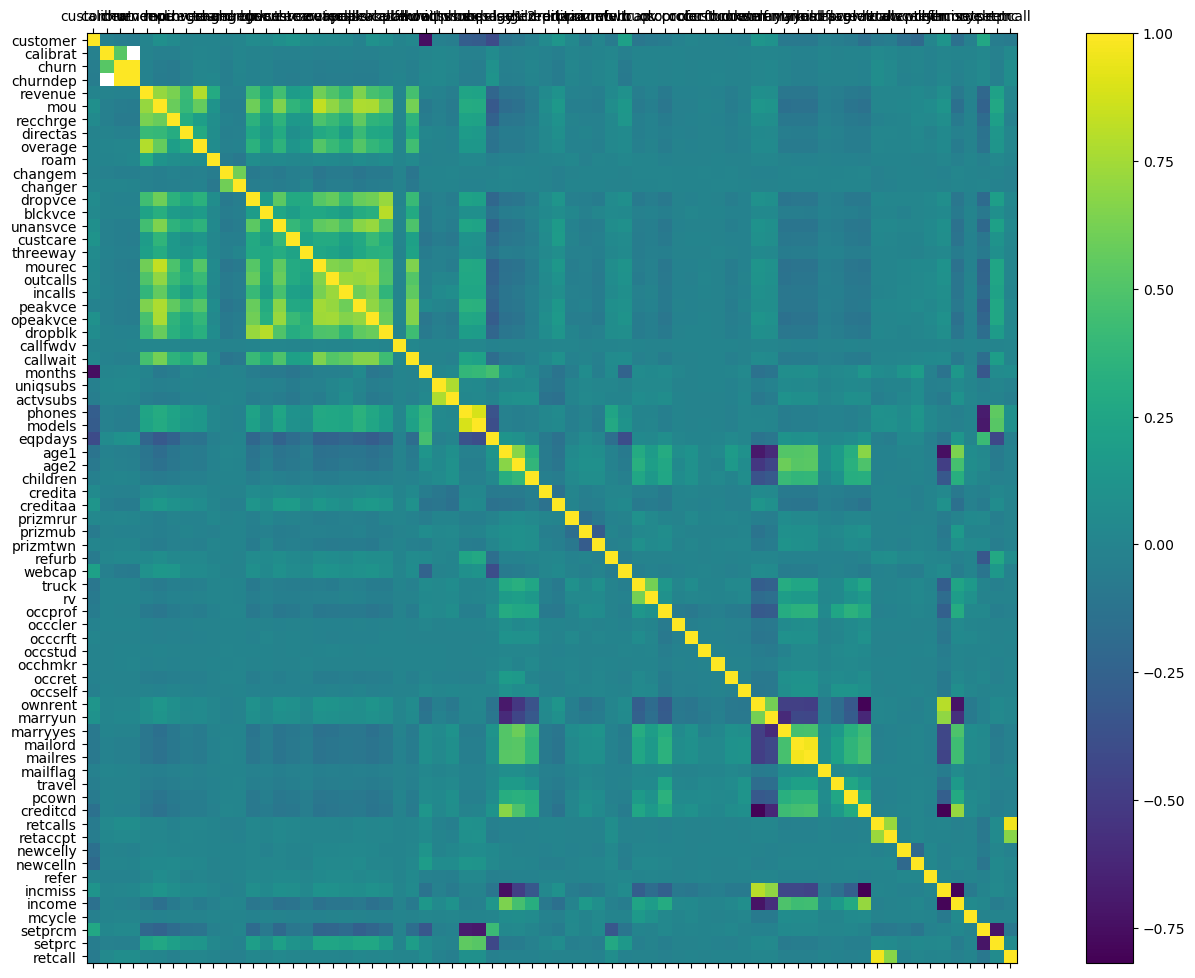

In [20]:
# plt.figure(figsize=(8,6))
plt.figure(figsize=(18,12),dpi=100)
plt.matshow(data.corr(), fignum=1)
plt.xticks(range(len(data.columns)), data.columns)
plt.yticks(range(len(data.columns)), data.columns)
plt.colorbar()
plt.show()

In [21]:
print(data.corr())

          customer  calibrat     churn  churndep   revenue       mou  \
customer  1.000000 -0.019678 -0.039474 -0.046202 -0.000175  0.085475   
calibrat -0.019678  1.000000  0.525075       NaN -0.005645 -0.025154   
churn    -0.039474  0.525075  1.000000  1.000000 -0.012956 -0.051652   
churndep -0.046202       NaN  1.000000  1.000000 -0.013566 -0.056955   
revenue  -0.000175 -0.005645 -0.012956 -0.013566  1.000000  0.711411   
...            ...       ...       ...       ...       ...       ...   
income   -0.137923 -0.001205 -0.011985 -0.017460 -0.084110 -0.146356   
mcycle   -0.027434  0.004868  0.005569  0.006395 -0.008756 -0.014983   
setprcm   0.269211  0.021560  0.036223  0.037282 -0.206311 -0.240662   
setprc   -0.046559 -0.016369 -0.026827 -0.026732  0.221437  0.273334   
retcall  -0.060767  0.040010  0.073317  0.074510  0.014550  0.010109   

          recchrge  directas   overage      roam  ...  retaccpt  newcelly  \
customer  0.050765 -0.003505  0.004456  0.001034  ... -0.0

In [22]:
# take out 'customer', 'calibrat', 'churn', 'churndep'
varlist=['revenue', 'mou',
       'recchrge', 'directas', 'overage', 'roam', 'changem', 'changer',
       'dropvce', 'blckvce', 'unansvce', 'custcare', 'threeway', 'mourec',
       'outcalls', 'incalls', 'peakvce', 'opeakvce', 'dropblk', 'callfwdv',
       'callwait', 'months', 'uniqsubs', 'actvsubs', 'phones', 'models',
       'eqpdays', 'age1', 'age2', 'children', 'credita', 'creditaa',
       'prizmrur', 'prizmub', 'prizmtwn', 'refurb', 'webcap', 'truck', 'rv',
       'occprof', 'occcler', 'occcrft', 'occstud', 'occhmkr', 'occret',
       'occself', 'ownrent', 'marryun', 'marryyes', 'mailord', 'mailres',
       'mailflag', 'travel', 'pcown', 'creditcd', 'retcalls', 'retaccpt',
       'newcelly', 'newcelln', 'refer', 'incmiss', 'income', 'mcycle',
       'setprcm', 'setprc', 'retcall']

In [23]:
res = mba263.logit(data_cal['churndep'],data_cal[varlist])

Optimization terminated successfully.
         Current function value: 0.671533
         Iterations 5


In [24]:
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                        Mba263Logit Regression Results                        
==============================================================================
Dep. Variable:               churndep   No. Observations:                38941
Model:                    Mba263Logit   Df Residuals:                    38874
Method:                           MLE   Df Model:                           66
Date:                Sat, 18 Apr 2020   Pseudo R-squ.:                 0.03117
Time:                        03:10:57   Log-Likelihood:                -26150.
converged:                       True   LL-Null:                       -26992.
Covariance Type:            nonrobust   LLR p-value:                6.012e-308
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1497      0.095      1.571      0.116      -0.037       0.336
revenue        0.0020      0.001      2.460      0.014       0.000       0.004
mou           -0.0003   4.96e-05     -5.657      0.000      -0.000      -0.000
recchrge      -0.0031      0.001     -3.513      0.000      -0.005      -0.001
directas      -0.0012      0.006     -0.201      0.840      -0.013       0.010
overage        0.0008      0.000      2.711      0.007       0.000       0.001
roam           0.0071      0.002      3.436      0.001       0.003       0.011
changem       -0.0005   5.35e-05     -9.194      0.000      -0.001      -0.000
changer        0.0023      0.000      6.247      0.000       0.002       0.003
dropvce        0.0113      0.007      1.563      0.118      -0.003       0.026
blckvce        0.0064      0.007      0.895      0.371      -0.008       0.020
unansvce       0.0009      0.000      2.058      0.040    4.38e-05       0.002
custcare      -0.0060      0.003     -2.331      0.020      -0.011      -0.001
threeway      -0.0303      0.011     -2.691      0.007      -0.052      -0.008
mourec         0.0001      0.000      1.018      0.309      -0.000       0.000
outcalls       0.0011      0.001      1.894      0.058   -3.87e-05       0.002
incalls       -0.0031      0.001     -2.937      0.003      -0.005      -0.001
peakvce       -0.0007      0.000     -3.058      0.002      -0.001      -0.000
opeakvce      -0.0002      0.000     -0.783      0.434      -0.001       0.000
dropblk       -0.0031      0.007     -0.442      0.658      -0.017       0.011
callfwdv      -0.0026      0.023     -0.114      0.909      -0.048       0.043
callwait       0.0021      0.003      0.664      0.507      -0.004       0.008
months        -0.0213      0.002    -10.652      0.000      -0.025      -0.017
uniqsubs       0.1844      0.020      9.225      0.000       0.145       0.224
actvsubs      -0.2057      0.028     -7.372      0.000      -0.260      -0.151
phones         0.0487      0.018      2.678      0.007       0.013       0.084
models         0.0138      0.028      0.495      0.621      -0.041       0.068
eqpdays        0.0014   7.47e-05     19.309      0.000       0.001       0.002
age1          -0.0033      0.001     -3.787      0.000      -0.005      -0.002
age2          -0.0012      0.001     -1.718      0.086      -0.003       0.000
children       0.0946      0.028      3.359      0.001       0.039       0.150
credita       -0.1781      0.036     -5.016      0.000      -0.248      -0.108
creditaa      -0.3626      0.035    -10.488      0.000      -0.430      -0.295
prizmrur       0.0665      0.050      1.342      0.180      -0.031       0.164
prizmub       -0.0396      0.024     -1.624      0.104      -0.087       0.008
prizmtwn       0.0462      0.031      1.470      0.142      -0.015       0.108
refurb         0.2340      0.032      7.323      0.000       0.171       0.297
webcap        -0.1561      0.038     -4.157      0.000      -0.230      -0.083
tr

In [25]:
# take out 
varlist2=['revenue', 'mou',
       'recchrge', 'overage', 'roam', 'changem', 'changer',
       'unansvce', 'custcare', 'threeway',
       'incalls', 'peakvce',
       'months', 'uniqsubs', 'actvsubs', 'phones',
       'eqpdays', 'age1', 'children', 'credita', 'creditaa',
       'refurb', 'webcap',
       'marryun', 'newcelly','income', 
       'setprcm', 'setprc', 'retcall']

In [26]:
res2 = mba263.logit(data_cal['churndep'],data_cal[varlist2])

Optimization terminated successfully.
         Current function value: 0.672791
         Iterations 5


In [27]:
res2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                        Mba263Logit Regression Results                        
==============================================================================
Dep. Variable:               churndep   No. Observations:                38941
Model:                    Mba263Logit   Df Residuals:                    38911
Method:                           MLE   Df Model:                           29
Date:                Sat, 18 Apr 2020   Pseudo R-squ.:                 0.02936
Time:                        03:11:16   Log-Likelihood:                -26199.
converged:                       True   LL-Null:                       -26992.
Covariance Type:            nonrobust   LLR p-value:                     0.000
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1524      0.078      1.961      0.050       0.000       0.305
revenue        0.0020      0.001      2.608      0.009       0.001       0.004
mou           -0.0002   3.99e-05     -5.155      0.000      -0.000      -0.000
recchrge      -0.0033      0.001     -3.745      0.000      -0.005      -0.002
overage        0.0007      0.000      2.742      0.006       0.000       0.001
roam           0.0075      0.002      3.634      0.000       0.003       0.012
changem       -0.0005   5.31e-05     -9.642      0.000      -0.001      -0.000
changer        0.0023      0.000      6.312      0.000       0.002       0.003
unansvce       0.0012      0.000      2.961      0.003       0.000       0.002
custcare      -0.0054      0.003     -2.148      0.032      -0.010      -0.000
threeway      -0.0195      0.011     -1.802      0.072      -0.041       0.002
incalls       -0.0018      0.001     -2.142      0.032      -0.003      -0.000
peakvce       -0.0003      0.000     -1.612      0.107      -0.001    6.83e-05
months        -0.0216      0.002    -11.313      0.000      -0.025      -0.018
uniqsubs       0.1855      0.020      9.309      0.000       0.146       0.225
actvsubs      -0.2091      0.028     -7.516      0.000      -0.264      -0.155
phones         0.0548      0.013      4.296      0.000       0.030       0.080
eqpdays        0.0014   7.26e-05     19.728      0.000       0.001       0.002
age1          -0.0039      0.001     -5.822      0.000      -0.005      -0.003
children       0.0798      0.026      3.083      0.002       0.029       0.130
credita       -0.1674      0.035     -4.743      0.000      -0.237      -0.098
creditaa      -0.3535      0.034    -10.294      0.000      -0.421      -0.286
refurb         0.2345      0.032      7.405      0.000       0.172       0.297
webcap        -0.1598      0.037     -4.269      0.000      -0.233      -0.086
marryun        0.0702      0.028      2.487      0.013       0.015       0.125
newcelly      -0.0706      0.026     -2.666      0.008      -0.122      -0.019
income        -0.0068      0.005     -1.481      0.139      -0.016       0.002
setprcm       -0.1060      0.040     -2.639      0.008      -0.185      -0.027
setprc         0.0006      0.000      2.078      0.038    3.33e-05       0.001
retcall        0.7406      0.058     12.836      0.000       0.627       0.854
==============================================================================
"""

In [28]:
# take out 'peakvce','threeway','income',
varlist3=['revenue', 'mou',
       'recchrge', 'overage', 'roam', 'changem', 'changer',
       'unansvce', 'custcare', 'incalls', 
       'months', 'uniqsubs', 'actvsubs', 'phones',
       'eqpdays', 'age1', 'children', 'credita', 'creditaa',
       'refurb', 'webcap',
       'marryun', 'newcelly',
       'setprcm', 'setprc', 'retcall']

In [29]:
res3 = mba263.logit(data_cal['churndep'],data_cal[varlist3])

Optimization terminated successfully.
         Current function value: 0.672897
         Iterations 5


In [30]:
res3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                        Mba263Logit Regression Results                        
==============================================================================
Dep. Variable:               churndep   No. Observations:                38941
Model:                    Mba263Logit   Df Residuals:                    38914
Method:                           MLE   Df Model:                           26
Date:                Sat, 18 Apr 2020   Pseudo R-squ.:                 0.02920
Time:                        03:11:34   Log-Likelihood:                -26203.
converged:                       True   LL-Null:                       -26992.
Covariance Type:            nonrobust   LLR p-value:                     0.000
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1519      0.076      1.985      0.047       0.002       0.302
revenue        0.0020      0.001      2.613      0.009       0.001       0.004
mou           -0.0002   3.81e-05     -6.011      0.000      -0.000      -0.000
recchrge      -0.0035      0.001     -4.106      0.000      -0.005      -0.002
overage        0.0007      0.000      2.478      0.013       0.000       0.001
roam           0.0075      0.002      3.647      0.000       0.003       0.012
changem       -0.0005    5.3e-05     -9.596      0.000      -0.001      -0.000
changer        0.0023      0.000      6.345      0.000       0.002       0.003
unansvce       0.0009      0.000      2.381      0.017       0.000       0.002
custcare      -0.0054      0.002     -2.160      0.031      -0.010      -0.000
incalls       -0.0022      0.001     -2.684      0.007      -0.004      -0.001
months        -0.0218      0.002    -11.468      0.000      -0.026      -0.018
uniqsubs       0.1855      0.020      9.313      0.000       0.146       0.225
actvsubs      -0.2115      0.028     -7.612      0.000      -0.266      -0.157
phones         0.0533      0.013      4.192      0.000       0.028       0.078
eqpdays        0.0014   7.25e-05     19.676      0.000       0.001       0.002
age1          -0.0044      0.001     -7.167      0.000      -0.006      -0.003
children       0.0750      0.026      2.916      0.004       0.025       0.125
credita       -0.1654      0.035     -4.693      0.000      -0.234      -0.096
creditaa      -0.3521      0.034    -10.280      0.000      -0.419      -0.285
refurb         0.2345      0.032      7.410      0.000       0.172       0.297
webcap        -0.1608      0.037     -4.299      0.000      -0.234      -0.087
marryun        0.0815      0.027      3.003      0.003       0.028       0.135
newcelly      -0.0697      0.026     -2.633      0.008      -0.122      -0.018
setprcm       -0.1072      0.040     -2.667      0.008      -0.186      -0.028
setprc         0.0006      0.000      2.028      0.043     1.9e-05       0.001
retcall        0.7408      0.058     12.845      0.000       0.628       0.854
==============================================================================
"""

In [31]:
mba263.odds_ratios(res3)

,Odds ratios,std err,z,P>|z|,[0.025,0.975]
revenue,1.002044,0.000783,2.610789,0.009,1.000525,1.003563
mou,0.999771,0.000038,6.011189,0.000,0.999697,0.999845
recchrge,0.996462,0.000860,4.113447,0.000,0.994794,0.998131
overage,1.000680,0.000274,2.476702,0.013,1.000147,1.001212
roam,1.007539,0.002075,3.633131,0.000,1.003513,1.011565
changem,0.999492,0.000053,9.598398,0.000,0.999389,0.999595
changer,1.002339,0.000369,6.337366,0.000,1.001623,1.003055
unansvce,1.000894,0.000376,2.379593,0.017,1.000165,1.001624
custcare,0.994630,0.002479,2.165672,0.030,0.989820,0.999440
incalls,0.997818,0.000812,2.687215,0.007,0.996243,0.999393


In [32]:
data_cal['predchurn']=res3.predict(data_cal[varlist3])

In [36]:
data_cal['predchurn'].mean()

0.4981382090855397

### validation set

In [33]:
data_val['predchurn']=res3.predict(data_val[varlist3])

In [34]:
data_val['predchurn'].mean()

0.478211497972356

In [35]:
data_val['churn'].mean()

0.019615421779882115

In [37]:
data_val['predchurn2']=res2.predict(data_val[varlist2])

In [38]:
data_val['predchurn2'].mean()

0.4781169114144996

In [40]:
data_val['predchurn1']=res.predict(data_val[varlist])

In [41]:
data_val['predchurn1'].mean()

0.47722733807628953

### try with alpha

In [48]:
res_a=mba263.logit_reg(data_cal['churndep'],data_cal[varlist3],alpha=3)

Optimization terminated successfully.    (Exit mode 0)
            Current function value: 0.6730980401313276
            Iterations: 166
            Function evaluations: 202
            Gradient evaluations: 166


In [49]:
res_a.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                      Results: Mba263Logit
=================================================================
Model:              Mba263Logit      Pseudo R-squared: 0.029     
Dependent Variable: churndep         AIC:              52460.8118
Date:               2020-04-18 03:31 BIC:              52692.1965
No. Observations:   38941            Log-Likelihood:   -26203.   
Df Model:           26               LL-Null:          -26992.   
Df Residuals:       38914            LLR p-value:      0.0000    
Converged:          1.0000           Scale:            1.0000    
No. Iterations:     166.0000                                     
------------------------------------------------------------------
              Coef.   Std.Err.     z      P>|z|    [0.025   0.975]
------------------------------------------------------------------
const         0.1262    0.0765    1.6503  0.0989  -0.0237   0.2760
revenue       0.0020    0.0008    2.6205  0.0088   0.0005   0.0036
mou          -0.0002    0.0000   -6.0111  0.0000  -0.0003  -0.0002
recchrge     -0.0035    0.0009   -4.0848  0.0000  -0.0052  -0.0018
overage       0.0007    0.0003    2.4730  0.0134   0.0001   0.0012
roam          0.0075    0.0021    3.6353  0.0003   0.0034   0.0115
changem      -0.0005    0.0001   -9.5960  0.0000  -0.0006  -0.0004
changer       0.0023    0.0004    6.3454  0.0000   0.0016   0.0031
unansvce      0.0009    0.0004    2.3832  0.0172   0.0002   0.0016
custcare     -0.0053    0.0025   -2.1463  0.0318  -0.0102  -0.0005
incalls      -0.0022    0.0008   -2.7129  0.0067  -0.0038  -0.0006
months       -0.0215    0.0019  -11.3298  0.0000  -0.0253  -0.0178
uniqsubs      0.1838    0.0199    9.2303  0.0000   0.1447   0.2228
actvsubs     -0.2069    0.0278   -7.4500  0.0000  -0.2614  -0.1525
phones        0.0537    0.0127    4.2284  0.0000   0.0288   0.0786
eqpdays       0.0014    0.0001   19.6687  0.0000   0.0013   0.0016
age1         -0.0043    0.0006   -7.1204  0.0000  -0.0055  -0.0031
children      0.0731    0.0257    2.8392  0.0045   0.0226   0.1235
credita      -0.1597    0.0352   -4.5327  0.0000  -0.2288  -0.0907
creditaa     -0.3465    0.0342  -10.1217  0.0000  -0.4136  -0.2794
refurb        0.2339    0.0316    7.3918  0.0000   0.1719   0.2959
webcap       -0.1525    0.0374   -4.0787  0.0000  -0.2258  -0.0792
marryun       0.0809    0.0272    2.9788  0.0029   0.0277   0.1341
newcelly     -0.0675    0.0265   -2.5514  0.0107  -0.1194  -0.0157
setprcm      -0.0985    0.0402   -2.4535  0.0141  -0.1772  -0.0198
setprc        0.0006    0.0003    2.1768  0.0295   0.0001   0.0012
retcall       0.7319    0.0576   12.7110  0.0000   0.6191   0.8448
=================================================================

"""

In [50]:
data_cal['predchurn_a']=res_a.predict(data_cal[varlist3])

In [51]:
data_cal['predchurn_a'].mean()

0.4980609979561832

In [52]:
data_val['predchurn_a']=res_a.predict(data_val[varlist3])

In [53]:
data_val['predchurn_a'].mean()

0.4782230461249154

## result

In [54]:
data_cal['grading']=10-mba263.ntile(data_cal['predchurn'],10)

In [55]:
data_cal['grading'].head(10)

31047     1.0
31048    10.0
31049    10.0
31050     6.0
31051     9.0
31052    10.0
31053    10.0
31054    10.0
31055    10.0
31056     8.0
Name: grading, dtype: float64

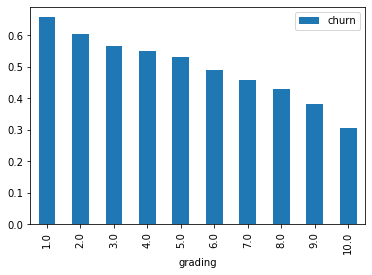

In [56]:
data_cal[ ['churn','grading'] ].groupby('grading').mean().plot(kind='bar')

In [57]:
data_val['grading']=10-mba263.ntile(data_val['predchurn'],10)

In [58]:
data_val['grading'].head(10)

0    10.0
1    10.0
2    10.0
3    10.0
4    10.0
5     5.0
6     8.0
7    10.0
8    10.0
9    10.0
Name: grading, dtype: float64

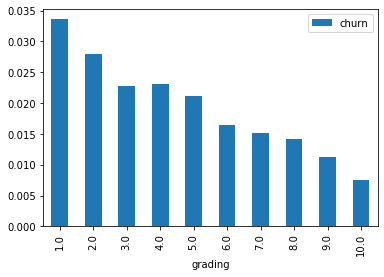

In [59]:
data_val[ ['churn','grading'] ].groupby('grading').mean().plot(kind='bar')

### gain and lift

In [61]:
gain_cal= mba263.gain(data_cal['churn'],data_cal['predchurn'],10)
gain_val= mba263.gain(data_val['churn'],data_val['predchurn'],10)

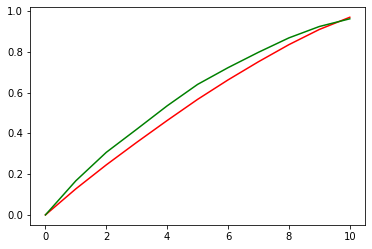

In [62]:
plt.plot(gain_cal,'r')
plt.plot(gain_val,'g')

In [64]:
lift_cal= mba263.lift(data_cal['churn'],data_cal['predchurn'],10)
lift_val= mba263.lift(data_val['churn'],data_val['predchurn'],10)

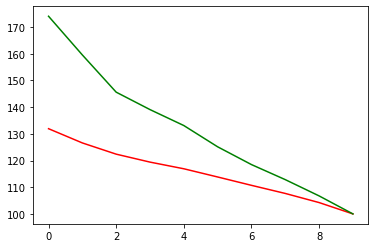

In [65]:
plt.plot(lift_cal,'r')
plt.plot(lift_val,'g')

In [66]:
lift_val

array([174.04997073, 159.5458065 , 145.61043302, 139.08078822,
       133.10580205, 125.14083345, 118.48213502, 112.84315486,
       106.75087597, 100.        ])